In [56]:
import pandas as pd
import numpy as np

In [57]:
envs = ['Palmira', 'Espinal', 'Caribia']
data = dict()
for i in envs:
    data[i] = pd.read_excel('./../data/by_env_GCDT_raw_data.xlsx', sheet_name=i,engine = 'openpyxl')
    print(i)
    print(data[i].columns)
    print('_'*10)
    
    

Palmira
Index(['Env', 'UE', 'cosecha', 'fech-cosecha', 'sitio de cosecha',
       'sector_plan', 'PlHar_number', 'PlHar', 'LA', 'UNLPLO', 'TRLPLO',
       'BLPLO', 'FLPLO', '#-vainas', 'NVV', 'PST', 'LeWPLO', 'VPWPLO',
       'FlWPLO', 'HePLO', 'P2PHI', 'SDP10P', 'PB10P', 'SB10P', '#VVERDES',
       '#sem', 'ps-cas-vainas', 'pssemillas', 'unique identifier', 'row',
       'col', 'Cross', 'Lugar', 'family', 'f1.2', 'f2.3', 'f3.4', 'f4.5',
       'f5.6', 'Genotype', '#-vainas_rem', 'NVV_rem', 'PST_rem', 'HePLO_rem',
       'P2PHI_rem', 'SDP10P_rem', 'PB10P_rem', 'SB10P_rem', '#VVERDES_rem',
       '#sem_rem', 'ps-cas-vainas_rem', 'pssemillas_rem', 'PHI', 'PHI_rem',
       'NS', 'NS_rem', 'NV', 'NV_rem', 'SDBPLO', 'SDBPLO_rem', 'PSC',
       'PSC_rem', 'PSV', 'PSV_rem', 'ICV', 'ICV_rem', 'PPI', 'PPI_rem', 'PPL',
       'PPL_rem', 'SDPL', 'SDPL_rem', 'YdPl', 'YdPl_rem', 'YdPl_ha', 'HI',
       'PPS', 'NSV', 'RdHa', 'log_10_RdHa'],
      dtype='object')
__________
Espinal
Index(['row', 'col

In [58]:
data['Palmira'].rename(columns = {'PHI':'PHI_10'}, inplace=True)

In [59]:
Palmira_vars = {'ICV':'PHI',
                'YdPl':'YdPl',
                'RdHa':'YdHa',
                'PPS':'SW',
                'PlHar_number':'PlHa',
               'unique identifier':'Unique_Id',
               'sitio de cosecha':'Location',
               'NSV':'PSN',
               'PSW':'SWP',
               'PSC':'PWW',
               'NVV': 'VPP', 
               'PST':'StWP'}
Espinal_vars = {'ICV':'PHI',
                'Wseed quantity':'SW',
               'unique identifier': 'Unique_Id',
               'plants':'PlHa',
               'PSW' : 'SWP'}
Caribia_vars = {'unique identifier': 'Unique_Id',
               'ID_Name':'Genotype',
               'PSV' : 'SWP'}
renames = [Palmira_vars, Espinal_vars, Caribia_vars]

for i, names in zip(envs,renames):
    data[i].rename(columns=names, inplace=True)
    

# Seed Weight per Pod

In [60]:
data['Palmira']['SWP'] = data['Palmira']['SDBPLO']/data['Palmira']['NV']

# Pod Seed Number

In [61]:
data['Espinal']['PSN'] = ((data['Espinal']['PESO SEMILLAS'])/data['Espinal']['SW'])/10
data['Espinal'].loc[data['Espinal'][data['Espinal']['PSN'] == np.inf].index, 'PSN'] = np.nan

In [62]:
data['Caribia']['Location'] = 'Caribia'
data['Espinal']['Location'] = 'Espinal'

In [63]:
#same units PHI
data['Caribia']['PHI'] = data['Caribia']['PHI']*100
data['Espinal']['PHI'] = data['Espinal']['PHI']*100
data['Espinal']['SW'] = data['Espinal']['SW']/100

In [64]:
columns = ['Location','Unique_Id','row','col', 'Genotype', 'PlHa', 'PHI', 'YdHa', 'YdPl']
tarCar = data['Caribia'][columns]
tarEsp = data['Espinal'][columns+['SW']]
tarPal = data['Palmira'][columns+['SW','PSN','SWP','HI','VPP', 'StWP']]


In [65]:
merged = pd.concat([tarPal, tarEsp, tarCar], ignore_index=True)
merged_cleaned = merged.replace(to_replace={np.inf:np.nan, -np.inf:np.nan, 0:np.nan})

# Categorize Harvested Plants 


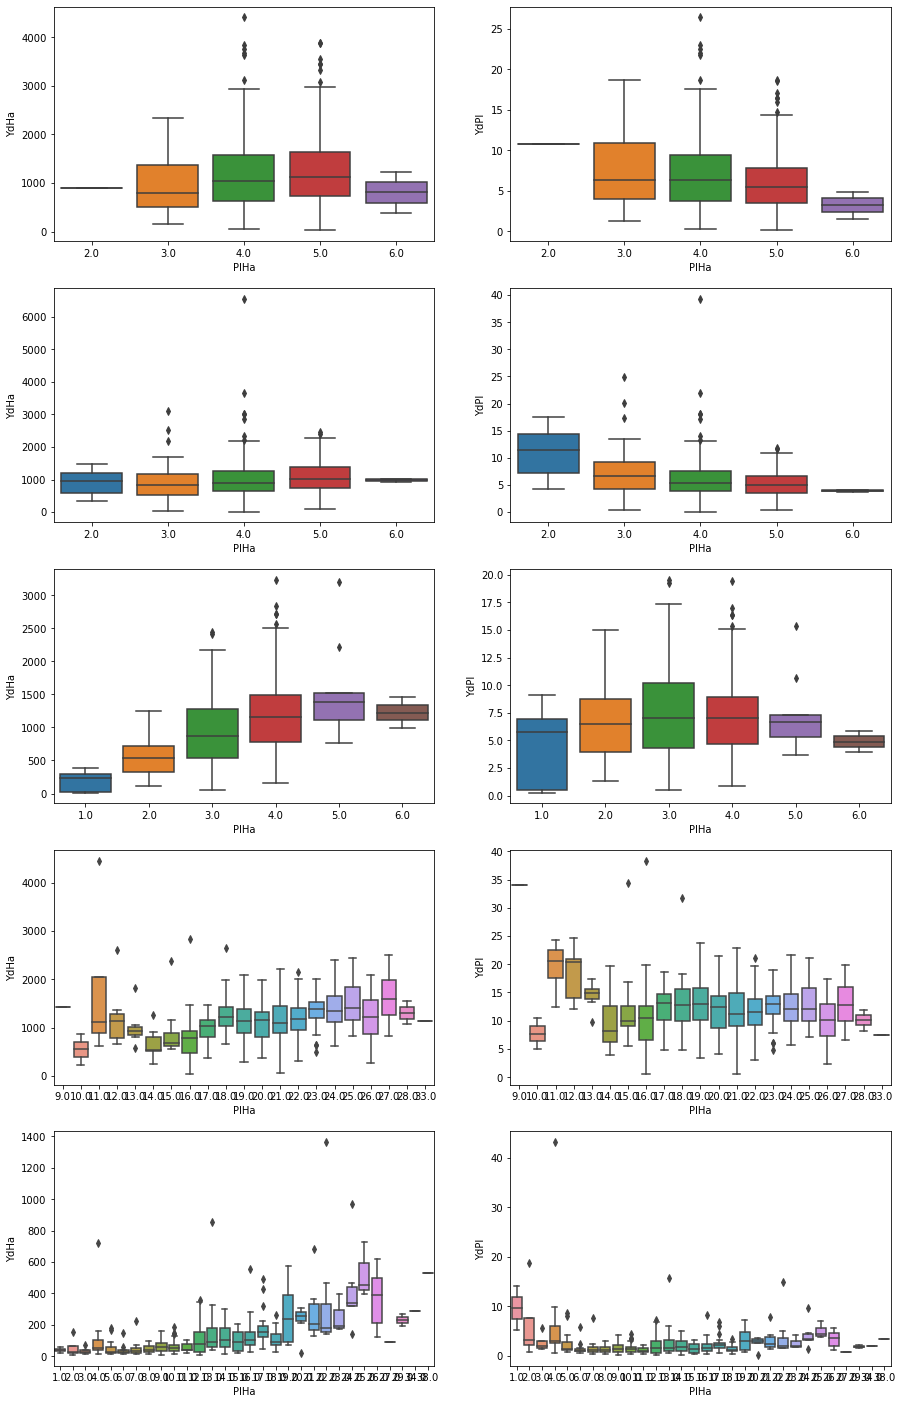

In [66]:
import matplotlib.pyplot as plt 
import seaborn as sns
w = 15
h = 5*5


fig, axs = plt.subplots(5,2,figsize=(w,h),sharex=False)

for i, loc in enumerate(merged_cleaned.Location.unique()):
    envDf = merged_cleaned[merged_cleaned['Location'] == loc]
    ax1 = axs[i,0]
    sns.boxplot(x='PlHa', y='YdHa',data=envDf, ax=ax1)
    ax2 = axs[i,1]
    sns.boxplot(x='PlHa', y='YdPl',data=envDf, ax=ax2)



    

In [76]:
merged_cleaned['PlHa_cat'] = pd.cut(merged_cleaned.PlHa,bins=np.linspace(0,100,51),labels=False)

# Normalization Genotype Names

In [77]:
normalized_Names = {'VAP_001':'VAP_001',
'ICTA_LIGERO':'ICTA_LIGERO',
'SEF_010':'SEF_010',
'SEF_060':'SEF_060',
'SMR_155':'SMR_155',
'SEN_118':'SEN_118',
'SMC_214':'SMC_214',
'G40287':'G40287',
'AMADEUS':'AMADEUS',
'DOR 390':'DOR_390',
'G40056':'G40056',
'G40111':'G40111',
'ROJO_SEDA':'ROJO_SEDA',
'19MCD03001.000':'19MCD03001.000',
'19MCD03005.000':'19MCD03005.000',
'19MCD03039.000':'19MCD03039.000',
'19MCD03041.000':'19MCD03041.000',
'19MCD03045.000':'19MCD03045.000',
'19MCD03047.000':'19MCD03047.000',
'DOR  390':'DOR_390',
'G  40001':'G40001',
'G  40019':'G40019',
'G  40111':'G40111', 
'G 40056':'G40056',
'G 40287':'G40287',
'HTA    4':'HTA_004',
'ICTA LIGERO':'ICTA_LIGERO',
'INB  841':'INB_841',
'MAM   38':'MAM_038',
'ROJO DE SEDA':'ROJO_SEDA',
'SEF   16':'SEF_016',
'SEF   60':'SEF_060',
'SEF  10':'SEF_010',
'SEN  052':'SEN_052',
'SEN  118':'SEN_118',
'SMC  214':'SMC_214',
'SMR  155':'SMR_155',
'TIO CANELA':'TIO_CANELA',
'VAP  1':'VAP_001'}

merged_cleaned.replace({'Genotype':normalized_Names}, inplace=True)

In [78]:
#split data in RILS and parentals
parents = merged_cleaned[~merged_cleaned.Genotype.str.startswith('GCDT')].Genotype.unique()
RILS = merged_cleaned[~merged_cleaned['Genotype'].isin(parents)]
parentalsDf = merged_cleaned[merged_cleaned['Genotype'].isin(parents)]
#remove other genotypes tested in Espina
parentalsDf.drop(parentalsDf[parentalsDf.Genotype.str.startswith('19MCD0')].index, inplace=True)



/home/scruz/miniconda3/envs/mask_rcnn_env/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
#remove Acutifolius lines for fit
FitDf = merged_cleaned[~merged_cleaned.Genotype.str.startswith('G4')]
FitDf.drop(FitDf[FitDf.Genotype.str.startswith('19MCD0')].index, inplace=True)
FitDf.to_csv('./../processed_data/GCDT_merged_Vulgaris.csv', index=False)

In [80]:
#Means of Acutifolius parents for reference in plots
teparyDf = merged_cleaned[merged_cleaned.Genotype.str.startswith('G4')]
teparyDf.groupby(['Location','Genotype'], as_index=False).mean().to_csv('./../results/Tepary_means.csv')

In [81]:

def getParentsMeans(df):
    parents = merged_cleaned[~merged_cleaned.Genotype.str.startswith('GCDT')].Genotype.unique()
    return df[df['Genotype'].isin(parents)]

# ViolinPlots Raw Data

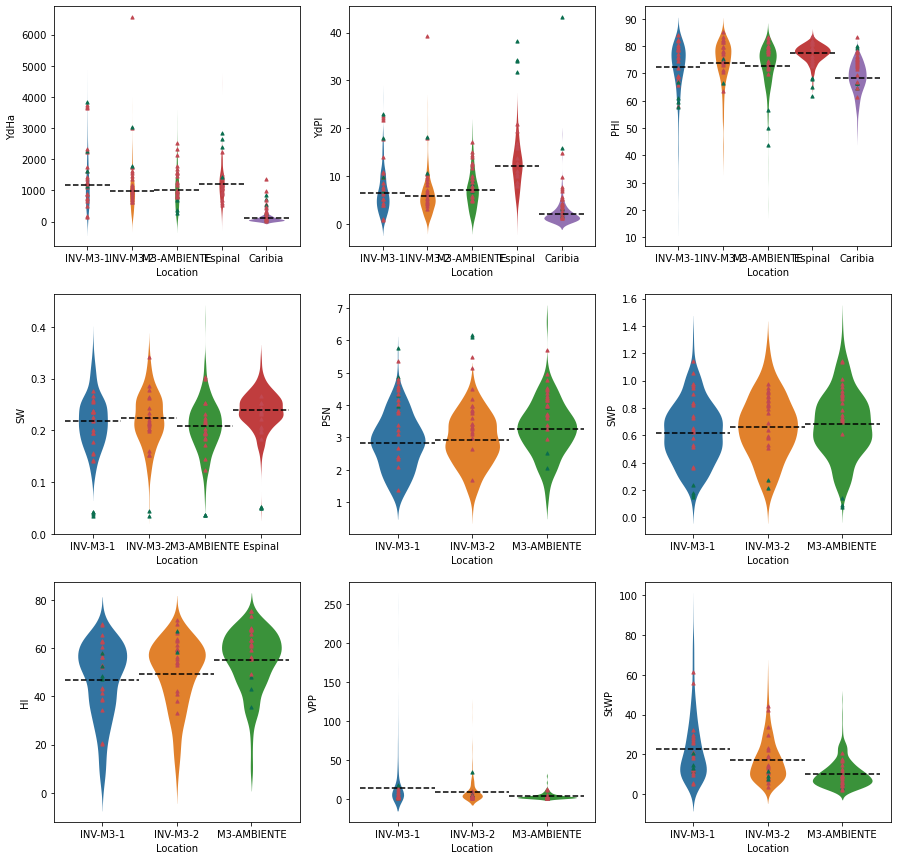

In [82]:
import matplotlib.pyplot as plt 
import seaborn as sns
w = 5*3
h = 5*3

s1=30
s2=60
a1=0.6
a2=0.8

pedigree_style ={'G1':['#848fa5ff','s',s1,a1],
'G2':['#aa00d4ff','P',s1,a1],
'G3':['#e4ac2eff','P',s1,a1],
'G4':['#2b2d42ff','s',s1,a1],
'G5':['#3777ffff','P',s1,a1],
'G6':['#848fa5ff','P',s1,a1],
'G7':['#000000b4','P',s1,a1],
'G8':['#0b6e4fff','s',s1,a1],
'G9':['#c14952fe','s',s1,a1],
'G10':['#aa00d4ff','s',s1,a1],
'G11':['#91f5adff','s',s1,a1],
'G12':['#e4ac2eff','s',s1,a1],
'G13':['#3777ffff','s',s1,a1],
'G14':['#91f5adff','P',s1,a1],
'G40056':['#0b6e4fff','^',s2,a2],
'G40287':['#0b6e4fff','^',s2,a2],
 'G40001':['#0b6e4fff','^',s2,a2],
'INB_841':['#0b6e4fff','^',s2,a2],
'ICTA_LIGERO':['#c14953ff','^',s2,a2],
'SEF_010':['#c14953ff','^',s2,a2],
'SEN_118':['#c14953ff','^',s2,a2],
'SMC_214':['#c14953ff','^',s2,a2],
'SMR_155':['#c14953ff','^',s2,a2],
'VAP_001':['#c14953ff','^',s2,a2],
'AMADEUS':['#c14953ff','^',s2,a2],
'DOR_390':['#c14953ff','^',s2,a2],
'G40019':['#c14953ff','^',s2,a2],
'G40111':['#c14953ff','^',s2,a2],
'SEF_016':['#c14953ff','^',s2,a2],
'SEF_060':['#c14953ff','^',s2,a2],
'SEN_052':['#c14953ff','^',s2,a2],
'ROJO_SEDA':['#c14953ff','^',s2,a2],
'HTA_004':['#c14953ff','^',s2,a2],
'MAM_038':['#c14953ff','^',s2,a2],
'TIO_CANELA':['#c14953ff','^',s2,a2],
                
}


fig, axs = plt.subplots(3,3,figsize=(w,h),sharex=False)
axs = axs.flatten()
j = 0
for i in ['YdHa','YdPl','PHI', 'SW', 'PSN', 'SWP','HI','VPP', 'StWP']:
    dfVar = RILS.dropna(subset=[i])
    order = dfVar.Location.unique()
    ax = axs[j]
    sns.violinplot(x="Location", y=i, data=dfVar, ax = ax, inner=None,  showmeans=True,linewidth=0,order=order)
    means = dfVar.groupby('Location').mean().loc[order][i].tolist()
    xs = np.array([-0.5,0.5])
    for imean in means:
        ax.plot(xs,[imean,imean], 'k--')
        xs += 1
    counter = 0
    
    for iloc in order:
        dfLoc = parentalsDf[parentalsDf['Location'] == iloc]
        parentsValues = getParentsMeans(dfLoc)
        parentesPlots = list()
        for parentI,row in parentsValues.iterrows():
            parentesPlots.append(ax.scatter(x=counter,y=row[i],marker=pedigree_style[row['Genotype']][1], c=pedigree_style[row['Genotype']][0], s=10))
        counter += 1
    
    j += 1
    
    
    
    
    
    
    
    
    
